In [ ]:
import numpy as np
from numpy import sort
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
import random as rn
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
import joblib

In [ ]:
# Carregar o arquivo de treinamento
data = pd.read_csv('/content/raman_15_01_2023.csv', index_col=False)
data.head()

,time,raman_1,raman_2,raman_3,raman_4,raman_5,raman_6,raman_7,raman_8,raman_9,...,raman_1897,raman_1898,raman_1899,raman_1900,raman_1901,rdi,b2,cao,feo,sio2
0,26-Aug-19,20.164283,52.036467,79.844790,103.716821,123.780133,140.162296,152.990882,162.393461,168.497604,...,-77.353297,-78.368291,-78.299440,-77.031477,-74.449132,14.896,1.637,12.383,6.570,7.577
1,27-Aug-19,-161.704917,-123.376786,-90.797857,-63.525298,-41.116276,-23.127960,-9.117518,1.357884,8.741076,...,-58.507702,-53.771423,-46.852941,-37.450795,-25.263524,12.052,1.602,12.217,6.822,7.640
2,28-Aug-19,-41.620396,-27.485395,-13.707676,-0.457282,12.095746,23.781363,34.429527,43.870196,51.933326,...,-64.032567,-88.332703,-119.183051,-157.213669,-203.054614,11.281,1.622,12.300,7.165,7.588
3,29-Aug-19,-34.277541,-18.293176,-4.358410,7.665343,17.916670,26.534158,33.656395,39.421965,43.969458,...,-59.522687,-59.236359,-58.566376,-57.572215,-56.313348,14.029,1.663,12.700,6.647,7.637
4,30-Aug-19,-46.786611,-47.484178,-45.580712,-41.458048,-35.498018,-28.082458,-19.593201,-10.412081,-0.920932,...,-127.463596,-131.622780,-131.949285,-127.770879,-118.415329,14.827,1.590,12.200,6.738,7.668


In [ ]:
data.index = pd.to_datetime(data["time"])
data.drop(['time'], axis=1, inplace=True)
#data.drop(['Data'], axis=1, inplace=True)
data = data.dropna()
data.tail()

<ipython-input-22-5526d863ba50>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.index = pd.to_datetime(data["time"])


,raman_1,raman_2,raman_3,raman_4,raman_5,raman_6,raman_7,raman_8,raman_9,raman_10,...,raman_1897,raman_1898,raman_1899,raman_1900,raman_1901,rdi,b2,cao,feo,sio2
time,,,,,,,,,,,,,,,,,,,,,
2022-04-24,-76.324289,-69.473159,-58.990500,-45.405931,-29.249075,-11.049551,8.663019,29.359014,50.508813,71.582795,...,-119.425873,-108.494457,-89.531493,-61.576647,-23.669585,11.782,1.859,13.100,7.000,7.047
2022-04-26,-104.007278,-90.786169,-77.442371,-64.038884,-50.638707,-37.304836,-24.100272,-11.088011,1.668946,14.107603,...,-79.853102,-83.962884,-88.634699,-93.947474,-99.980137,16.137,1.791,12.183,7.238,6.805
2022-04-27,-52.757555,-33.138861,-14.401714,3.410197,20.253184,36.083558,50.857632,64.531717,77.062125,88.405168,...,-104.961171,-109.820888,-110.841376,-107.367691,-98.744888,15.957,1.828,12.317,7.330,6.738
2022-04-28,-73.076352,-39.597874,-15.222351,1.107773,10.450052,13.862043,12.401299,7.125378,-0.908167,-10.641780,...,-57.361767,-51.542334,-46.798989,-43.556290,-42.238791,16.877,1.803,12.300,6.658,6.823
2022-04-29,-111.886869,-103.190590,-93.489719,-82.925901,-71.640783,-59.776011,-47.473230,-34.874086,-22.120226,-9.353296,...,-75.692376,-82.679156,-92.214687,-104.776463,-120.841978,15.875,1.816,12.620,7.092,6.950


In [ ]:
# Separar dados em vetores de entrada e saída
# Separar dados em vetores de entrada e saída
X = data.iloc[0:, :-5].values
rdi = data["rdi"]
b2 = data["b2"]
feo = data["feo"]
cao = data["cao"]
sio2 = data["sio2"]

In [ ]:
X.shape

(257, 1901)

<ipython-input-25-f4047ddb740c>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([b2[2],b2[11],b2[26],b2[30]])


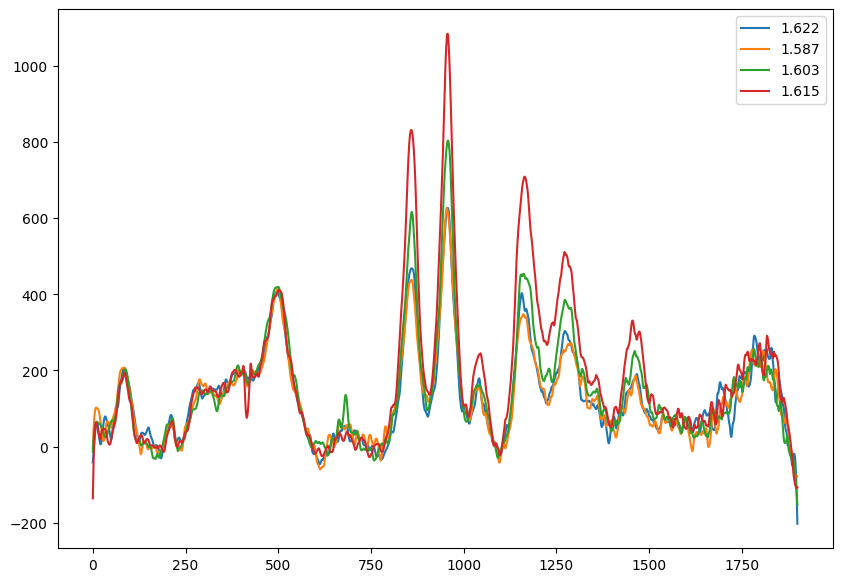

In [ ]:
fig = plt.figure(figsize = (10, 7))

plt.plot(X[2,:])
plt.plot(X[11,:])
plt.plot(X[26,:])
plt.plot(X[30,:])
plt.legend([b2[2],b2[11],b2[26],b2[30]])

In [ ]:
# scale data
#scaler = StandardScaler().fit(X.T)
scaler = MinMaxScaler().fit(X.T)
Xnorm = scaler.transform(X.T).T

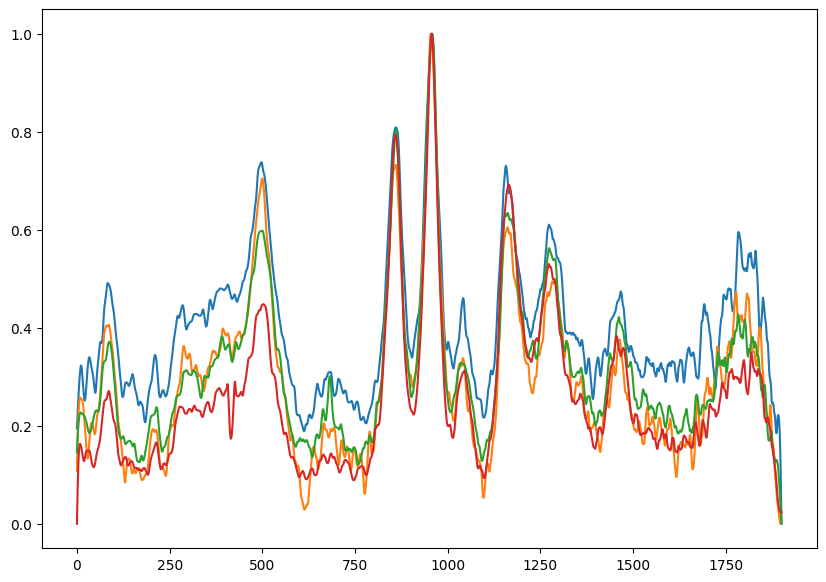

In [ ]:
fig = plt.figure(figsize = (10, 7))

plt.plot(Xnorm[2,:])
plt.plot(Xnorm[11,:])
plt.plot(Xnorm[26,:])
plt.plot(Xnorm[30,:])

In [ ]:
#Magnetita
lim1 = 1; #400
lim2 = 51; #450

#CaO
lim3 = 201; #600
lim4 = 401; #800

#SIO2
lim5 = 401; #800
lim6 = 601; #1000

#MgO
lim7 = 801; #1200
lim8 = 901; #1300

#Hematita
#lim9 = 901; #1300
#lim10 = 1001; #1400

#Magnetita
lim9 = 1101; #1500
lim10 = 1201; #1600



In [ ]:
Xsub1 = Xnorm[:,lim1:lim2]
Xsub2 = Xnorm[:,lim3:lim4]
Xsub3 = Xnorm[:,lim5:lim6]
Xsub4 = Xnorm[:,lim7:lim8]
Xsub5 = Xnorm[:,lim9:lim10]
#Xsub6 = Xnorm[:,lim11:lim12]

#Xnew = np.concatenate((Xsub1,Xsub2,Xsub3,Xsub4,Xsub5,Xsub6),axis=1)
Xnew = np.concatenate((Xsub1,Xsub2,Xsub3,Xsub4,Xsub5),axis=1)
#Xnew = Xnorm

In [ ]:
Xnew.shape

(257, 650)

In [ ]:
y = b2.values
#y = feo.values
#y = rdi.values
#Xnew = umap_data
#Xnew = tsne_data
#Xnew = X_pca

X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Define the parameters and their range
parameters = {'n_neighbors':np.arange(2, 11, 1)}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_knn= RandomizedSearchCV(KNeighborsRegressor(), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_knn.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter n_neighbors = ', model_knn.best_params_['n_neighbors'])
print('R2 calibration: %5.3f'  % model_knn.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_knn1 = KNeighborsRegressor(n_neighbors=model_knn.best_params_['n_neighbors'])
y_cv = cross_val_predict(model_knn1, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV: %5.3f'  % score_cv)
print('RMSE CV: %5.3f' % mse_cv)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameter n_neighbors =  5
R2 calibration: 0.860
R2 CV: 0.790
RMSE CV: 0.071


In [ ]:
# Teste
model_knn1.fit(X_train, y_train)
yhat_knn = model_knn1.predict(X_test)
print("RMSE:",mean_squared_error(yhat_knn,y_test,squared=False))

RMSE: 0.04236787607465024


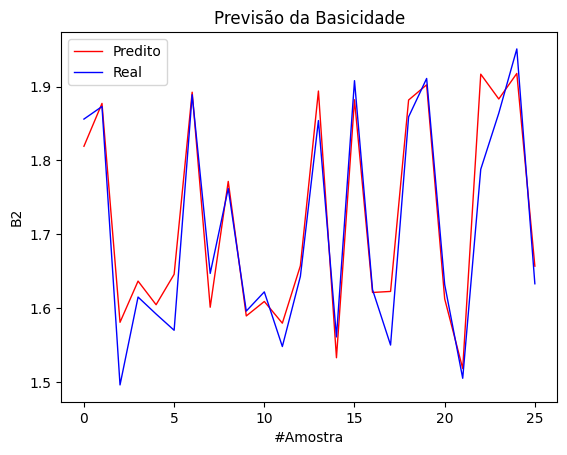

In [ ]:
mysignals = [{'name': 'Predito', 'y': yhat_knn,'color':'r', 'linewidth':1},
            {'name': 'Real', 'y': y_test, 'color':'b', 'linewidth':1}]

fig, ax = plt.subplots()
for signal in mysignals:
    ax.plot(signal['y'],
            color=signal['color'],
            linewidth=signal['linewidth'],
            label=signal['name'])

# Enable legend
ax.legend()
ax.set_title("Previsão da Basicidade")
plt.xlabel("#Amostra")
plt.ylabel("B2")
plt.show()

In [ ]:
# Define the parameters and their range
parameters = {'n_components':np.arange(2, 30, 1)}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_pls= RandomizedSearchCV(PLSRegression(), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_pls.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter n_components = ', model_pls.best_params_['n_components'])
print('R2 calibration: %5.3f'  % model_pls.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_pls1 = PLSRegression(n_components=model_pls.best_params_['n_components'])
y_cv = cross_val_predict(model_pls1, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV: %5.3f'  % score_cv)
print('RMSE CV: %5.3f' % mse_cv)

Best parameter n_components =  6
R2 calibration: 0.858
R2 CV: 0.831
RMSE CV: 0.064


In [ ]:
# Teste
model_pls1.fit(X_train, y_train)
yhat_pls = model_pls1.predict(X_test)
print("RMSE:",mean_squared_error(yhat_pls,y_test,squared=False))

RMSE: 0.0586279402989572


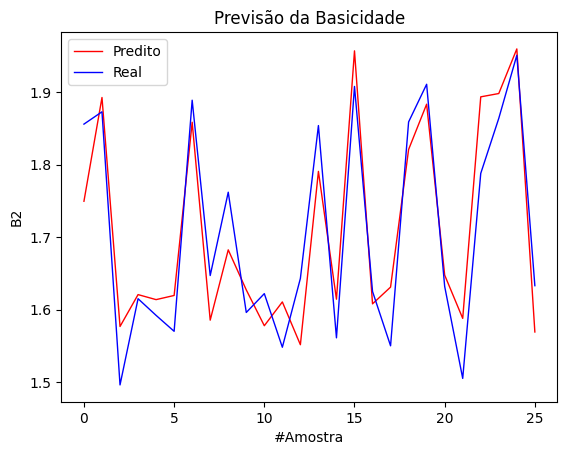

In [ ]:
mysignals = [{'name': 'Predito', 'y': yhat_pls,'color':'r', 'linewidth':1},
            {'name': 'Real', 'y': y_test, 'color':'b', 'linewidth':1}]

fig, ax = plt.subplots()
for signal in mysignals:
    ax.plot(signal['y'],
            color=signal['color'],
            linewidth=signal['linewidth'],
            label=signal['name'])

# Enable legend
ax.legend()
ax.set_title("Previsão da Basicidade")
plt.xlabel("#Amostra")
plt.ylabel("B2")
plt.show()

In [ ]:
# Define the parameters and their range
parameters = {'alpha':stats.expon(scale=10)}
#Run a Grid search, using R^2 as the metric to optimise alpha
ridge= RandomizedSearchCV(linear_model.Ridge(), parameters, scoring='r2', cv=10)
# Fit to the data
ridge.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter alpha = ', ridge.best_params_['alpha'])
print('R2 calibration: %5.3f'  % ridge.score(X_train,y_train))
# Run a ridge regression with the optimised value
ridge1 = linear_model.Ridge(alpha=ridge.best_params_['alpha'])
y_cv = cross_val_predict(ridge1, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV (Ridge): %5.3f'  % score_cv)
print('RMSE CV (Ridge): %5.3f' % mse_cv)

Best parameter alpha =  2.165826737955946
R2 calibration: 0.875
R2 CV (Ridge): 0.844
RMSE CV (Ridge): 0.061


In [ ]:
# Teste
ridge1.fit(X_train, y_train)
yhat_ridge = ridge1.predict(X_test)
print("RMSE:",mean_squared_error(yhat_ridge,y_test,squared=False))

RMSE: 0.05105358686910367


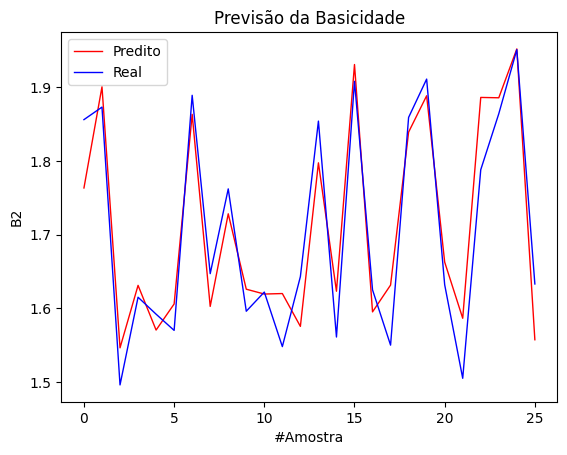

In [ ]:
mysignals = [{'name': 'Predito', 'y': yhat_ridge,'color':'r', 'linewidth':1},
            {'name': 'Real', 'y': y_test, 'color':'b', 'linewidth':1}]

fig, ax = plt.subplots()
for signal in mysignals:
    ax.plot(signal['y'],
            color=signal['color'],
            linewidth=signal['linewidth'],
            label=signal['name'])

# Enable legend
ax.legend()
ax.set_title("Previsão da Basicidade")
plt.xlabel("#Amostra")
plt.ylabel("B2")
plt.show()

In [ ]:
# Define the parameters and their range
parameters = {"C": stats.uniform(0.1,100), "epsilon": stats.expon(scale=.1),
              "kernel": ['rbf']}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_svr = RandomizedSearchCV(SVR(gamma='auto'), parameters, scoring='r2', cv=10, random_state=42)
# Fit to the data
model_svr.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter epsilon = ', model_svr.best_params_['epsilon'])
print('Best parameter C = ', model_svr.best_params_['C'])
print('Best parameter kernel = ', model_svr.best_params_['kernel'])
#print('Best parameter gamma = ', model_svr.best_params_['gamma'])
print('R2 calibration: %5.3f'  % model_svr.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_svr1 = SVR(C=model_svr.best_params_['C'], kernel=model_svr.best_params_['kernel'],
                 epsilon=model_svr.best_params_['epsilon'])
y_cv = cross_val_predict(model_svr1, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV (SVR): %5.3f'  % score_cv)
print('RMSE CV (SVR): %5.3f' % mse_cv)

Best parameter epsilon =  0.016959629191460518
Best parameter C =  15.701864044243651
Best parameter kernel =  rbf
R2 calibration: 0.892
R2 CV (SVR): 0.817
RMSE CV (SVR): 0.066


In [ ]:
# Teste
model_svr1.fit(X_train, y_train)
yhat_svr = model_svr1.predict(X_test)
print("RMSE:",mean_squared_error(yhat_svr,y_test,squared=False))

RMSE: 0.06099904987837287


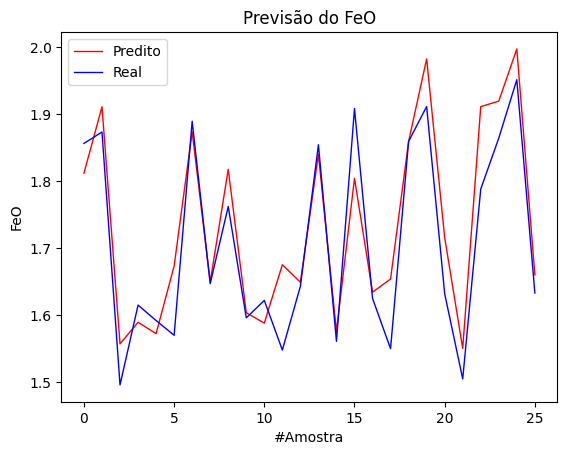

In [ ]:
mysignals = [{'name': 'Predito', 'y': yhat_svr,'color':'r', 'linewidth':1},
            {'name': 'Real', 'y': y_test, 'color':'b', 'linewidth':1}]

fig, ax = plt.subplots()
for signal in mysignals:
    ax.plot(signal['y'],
            color=signal['color'],
            linewidth=signal['linewidth'],
            label=signal['name'])

# Enable legend
ax.legend()
ax.set_title("Previsão do FeO")
plt.xlabel("#Amostra")
plt.ylabel("FeO")
plt.show()

In [ ]:
# Define the parameters and their range
parameters = {"n_estimators":np.arange(10, 100, 5), "max_depth":np.arange(1, 15, 1)}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_rf = RandomizedSearchCV(RandomForestRegressor(), parameters, scoring='r2', cv=10, random_state=42)
# Fit to the data
model_rf.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter max_depth = ', model_rf.best_params_['max_depth'])
print('Best parameter n_estimators = ', model_rf.best_params_['n_estimators'])
print('R2 calibration: %5.3f'  % model_rf.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_rf1 = RandomForestRegressor(n_estimators=model_rf.best_params_['n_estimators'], max_depth=model_rf.best_params_['max_depth'])
y_cv = cross_val_predict(model_rf1, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV (RF): %5.3f'  % score_cv)
print('RMSE CV (RF): %5.3f' % mse_cv)

Best parameter max_depth =  12
Best parameter n_estimators =  15
R2 calibration: 0.959
R2 CV (RF): 0.779
RMSE CV (RF): 0.073


In [ ]:
# Teste
model_rf1.fit(X_train, y_train)
yhat_rf = model_rf1.predict(X_test)
print("RMSE:",mean_squared_error(yhat_rf,y_test,squared=False))

RMSE: 0.05929300254694518


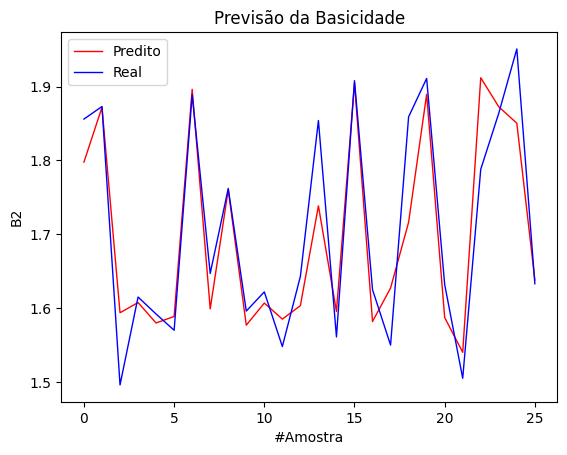

In [ ]:
mysignals = [{'name': 'Predito', 'y': yhat_rf,'color':'r', 'linewidth':1},
            {'name': 'Real', 'y': y_test, 'color':'b', 'linewidth':1}]

fig, ax = plt.subplots()
for signal in mysignals:
    ax.plot(signal['y'],
            color=signal['color'],
            linewidth=signal['linewidth'],
            label=signal['name'])

# Enable legend
ax.legend()
ax.set_title("Previsão da Basicidade")
plt.xlabel("#Amostra")
plt.ylabel("B2")
plt.show()

In [ ]:
## StackingRegression

estimators = [('pls', model_pls1), ('svr', model_svr1), ('rdg', ridge1), ('rf', model_rf1)]
er = StackingRegressor(estimators=estimators, final_estimator=KNeighborsRegressor())

er.fit(X_train, y_train)
yhat_er = er.predict(X_test)
print("RMSE:",mean_squared_error(yhat_er,y_test,squared=False))

RMSE: 0.04656403366085494


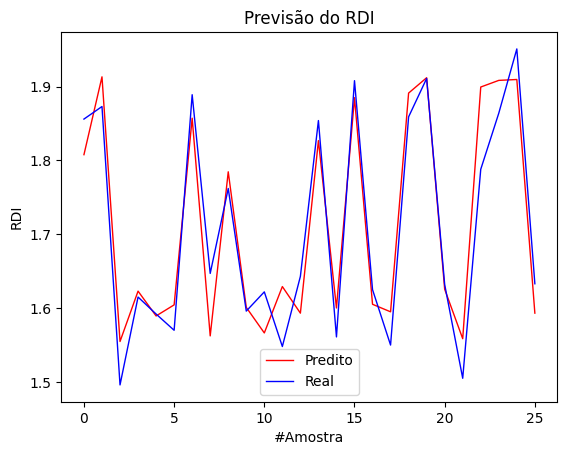

In [ ]:
mysignals = [{'name': 'Predito', 'y': yhat_er,'color':'r', 'linewidth':1},
            {'name': 'Real', 'y': y_test, 'color':'b', 'linewidth':1}]

fig, ax = plt.subplots()
for signal in mysignals:
    ax.plot(signal['y'],
            color=signal['color'],
            linewidth=signal['linewidth'],
            label=signal['name'])

# Enable legend
ax.legend()
ax.set_title("Previsão do RDI")
plt.xlabel("#Amostra")
plt.ylabel("RDI")
plt.show()

## Estrategia 2 - CaO/Sio2

In [ ]:
# Dados Treinamento
#y3 = rdi.values
#y3 = feo.values
y3 = b2.values
y2 = cao.values
y1 = sio2.values

In [ ]:
n_samples = len(y1)
indices = np.arange(n_samples)

X_train, X_test, y_train, y_test, idx_tr, idx_ts = train_test_split(Xnew, y1, indices, test_size=0.1, random_state=42)

# Sio2

In [ ]:
# Define the parameters and their range
parameters = {'n_components':np.arange(2, 10, 1)}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_pls= RandomizedSearchCV(PLSRegression(), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_pls.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter n_components = ', model_pls.best_params_['n_components'])
print('R2 calibration: %5.3f'  % model_pls.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_pls_sio2 = PLSRegression(n_components=model_pls.best_params_['n_components'])
y_cv = cross_val_predict(model_pls_sio2, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV: %5.3f'  % score_cv)
print('RMSE CV: %5.3f' % mse_cv)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameter n_components =  4
R2 calibration: 0.458
R2 CV: 0.395
RMSE CV: 0.342


In [ ]:
# Sio2
model_pls_sio2.fit(X_train, y_train)
y_sio2_pls = model_pls_sio2.predict(X_train)

In [ ]:
# Define the parameters and their range
parameters = {'n_neighbors':np.arange(2, 30, 1)}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_knn = RandomizedSearchCV(KNeighborsRegressor(), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_knn.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter n_neighbors = ', model_knn.best_params_['n_neighbors'])
print('R2 calibration: %5.3f'  % model_knn.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_knn_sio2 = KNeighborsRegressor(n_neighbors=model_knn.best_params_['n_neighbors'])
y_cv = cross_val_predict(model_knn_sio2, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV: %5.3f'  % score_cv)
print('RMSE CV: %5.3f' % mse_cv)

Best parameter n_neighbors =  12
R2 calibration: 0.384
R2 CV: 0.274
RMSE CV: 0.375


In [ ]:
# Sio2
model_knn_sio2.fit(X_train, y_train)
y_sio2_knn = model_knn_sio2.predict(X_train)

In [ ]:
# Define the parameters and their range
parameters = {"C": stats.uniform(0.1,100), "epsilon": stats.expon(scale=.1),
              "kernel": ['rbf']}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_svr = RandomizedSearchCV(SVR(gamma='auto'), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_svr.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter epsilon = ', model_svr.best_params_['epsilon'])
print('Best parameter C = ', model_svr.best_params_['C'])
print('Best parameter kernel = ', model_svr.best_params_['kernel'])
#print('Best parameter gamma = ', model_svr.best_params_['gamma'])
print('R2 calibration: %5.3f'  % model_svr.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_svr_sio2 = SVR(C=model_svr.best_params_['C'], kernel=model_svr.best_params_['kernel'],
                 epsilon=model_svr.best_params_['epsilon'])
y_cv = cross_val_predict(model_svr_sio2, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV (SVR): %5.3f'  % score_cv)
print('RMSE CV (SVR): %5.3f' % mse_cv)

Best parameter epsilon =  0.00672894364321668
Best parameter C =  84.6093822126311
Best parameter kernel =  rbf
R2 calibration: 0.513
R2 CV (SVR): -0.015
RMSE CV (SVR): 0.444


In [ ]:
# Teste
model_svr_sio2.fit(X_train, y_train)
y_sio2_svr = model_svr_sio2.predict(X_train)

In [ ]:
# Define the parameters and their range
parameters = {"n_estimators":np.arange(10, 100, 5), "max_depth":np.arange(1, 20, 1)}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_rf = RandomizedSearchCV(RandomForestRegressor(), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_rf.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter max_depth = ', model_rf.best_params_['max_depth'])
print('Best parameter n_estimators = ', model_rf.best_params_['n_estimators'])
print('R2 calibration: %5.3f'  % model_rf.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_rf_sio2 = RandomForestRegressor(n_estimators=model_rf.best_params_['n_estimators'], max_depth=model_rf.best_params_['max_depth'])
y_cv = cross_val_predict(model_rf_sio2, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV (RF): %5.3f'  % score_cv)
print('RMSE CV (RF): %5.3f' % mse_cv)

Best parameter max_depth =  7
Best parameter n_estimators =  20
R2 calibration: 0.849
R2 CV (RF): 0.239
RMSE CV (RF): 0.384


In [ ]:
# Teste
model_rf_sio2.fit(X_train, y_train)
y_sio2_rf = model_rf_sio2.predict(X_train)

In [ ]:
# Define the parameters and their range
parameters = {'alpha':stats.expon(scale=10)}
#Run a Grid search, using R^2 as the metric to optimise alpha
ridge= RandomizedSearchCV(linear_model.Ridge(), parameters, scoring='r2', cv=10)
# Fit to the data
ridge.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter alpha = ', ridge.best_params_['alpha'])
print('R2 calibration: %5.3f'  % ridge.score(X_train,y_train))
# Run a ridge regression with the optimised value
ridge_sio2 = linear_model.Ridge(alpha=ridge.best_params_['alpha'])
y_cv = cross_val_predict(ridge_sio2, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV (Ridge): %5.3f'  % score_cv)
print('RMSE CV (Ridge): %5.3f' % mse_cv)

Best parameter alpha =  2.572462677246175
R2 calibration: 0.499
R2 CV (Ridge): 0.385
RMSE CV (Ridge): 0.345


In [ ]:
# Teste
ridge_sio2.fit(X_train, y_train)
y_sio2_ridge = ridge_sio2.predict(X_train)

# CaO

In [ ]:
X_train = Xnew[idx_tr,:]
y_train = y2[idx_tr]

In [ ]:
# Define the parameters and their range
parameters = {'n_components':np.arange(2, 30, 1)}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_pls= RandomizedSearchCV(PLSRegression(), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_pls.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter n_components = ', model_pls.best_params_['n_components'])
print('R2 calibration: %5.3f'  % model_pls.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_pls_cao = PLSRegression(n_components=model_pls.best_params_['n_components'])
y_cv = cross_val_predict(model_pls_cao, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV: %5.3f'  % score_cv)
print('RMSE CV: %5.3f' % mse_cv)

Best parameter n_components =  6
R2 calibration: 0.733
R2 CV: 0.686
RMSE CV: 0.698


In [ ]:
# Vetor CaO
model_pls_cao.fit(X_train, y_train)
y_cao_pls = model_pls_cao.predict(X_train)

In [ ]:
# Define the parameters and their range
parameters = {'n_neighbors':np.arange(2, 30, 1)}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_knn= RandomizedSearchCV(KNeighborsRegressor(), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_knn.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter n_neighbors = ', model_knn.best_params_['n_neighbors'])
print('R2 calibration: %5.3f'  % model_knn.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_knn_cao = KNeighborsRegressor(n_neighbors=model_knn.best_params_['n_neighbors'])
y_cv = cross_val_predict(model_knn_cao, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV: %5.3f'  % score_cv)
print('RMSE CV: %5.3f' % mse_cv)

Best parameter n_neighbors =  5
R2 calibration: 0.743
R2 CV: 0.611
RMSE CV: 0.778


In [ ]:
# Vetor CaO
model_knn_cao.fit(X_train, y_train)
y_cao_knn = model_knn_cao.predict(X_train)

In [ ]:
# Define the parameters and their range
parameters = {"C": stats.uniform(0.1,100), "epsilon": stats.expon(scale=.1),
              "kernel": ['rbf']}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_svr = RandomizedSearchCV(SVR(gamma='auto'), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_svr.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter epsilon = ', model_svr.best_params_['epsilon'])
print('Best parameter C = ', model_svr.best_params_['C'])
print('Best parameter kernel = ', model_svr.best_params_['kernel'])
#print('Best parameter gamma = ', model_svr.best_params_['gamma'])
print('R2 calibration: %5.3f'  % model_svr.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_svr_cao = SVR(C=model_svr.best_params_['C'], kernel=model_svr.best_params_['kernel'],
                 epsilon=model_svr.best_params_['epsilon'])
y_cv = cross_val_predict(model_svr_cao, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV (SVR): %5.3f'  % score_cv)
print('RMSE CV (SVR): %5.3f' % mse_cv)

Best parameter epsilon =  0.035726038579992535
Best parameter C =  88.59475383764735
Best parameter kernel =  rbf
R2 calibration: 0.755
R2 CV (SVR): 0.596
RMSE CV (SVR): 0.792


In [ ]:
# Teste
model_svr_cao.fit(X_train, y_train)
y_cao_svr = model_svr_cao.predict(X_train)

In [ ]:
# Define the parameters and their range
parameters = {"n_estimators":np.arange(10, 200, 10), "max_depth":np.arange(1, 20, 1)}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_rf = RandomizedSearchCV(RandomForestRegressor(), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_rf.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter max_depth = ', model_rf.best_params_['max_depth'])
print('Best parameter n_estimators = ', model_rf.best_params_['n_estimators'])
print('R2 calibration: %5.3f'  % model_rf.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_rf_cao = RandomForestRegressor(n_estimators=model_rf.best_params_['n_estimators'], max_depth=model_rf.best_params_['max_depth'])
y_cv = cross_val_predict(model_rf_cao, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV (RF): %5.3f'  % score_cv)
print('RMSE CV (RF): %5.3f' % mse_cv)

Best parameter max_depth =  17
Best parameter n_estimators =  180
R2 calibration: 0.948
R2 CV (RF): 0.618
RMSE CV (RF): 0.770


In [ ]:
# Teste
model_rf_cao.fit(X_train, y_train)
y_cao_rf = model_rf_cao.predict(X_train)

In [ ]:
# Define the parameters and their range
parameters = {'alpha':stats.expon(scale=10)}
#Run a Grid search, using R^2 as the metric to optimise alpha
ridge= RandomizedSearchCV(linear_model.Ridge(), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
ridge.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter alpha = ', ridge.best_params_['alpha'])
print('R2 calibration: %5.3f'  % ridge.score(X_train,y_train))
# Run a ridge regression with the optimised value
ridge_cao = linear_model.Ridge(alpha=ridge.best_params_['alpha'])
y_cv = cross_val_predict(ridge_cao, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV (Ridge): %5.3f'  % score_cv)
print('RMSE CV (Ridge): %5.3f' % mse_cv)

Best parameter alpha =  1.828887613441137
R2 calibration: 0.751
R2 CV (Ridge): 0.694
RMSE CV (Ridge): 0.690


In [ ]:
# Teste
ridge_cao.fit(X_train, y_train)
y_cao_ridge = ridge_cao.predict(X_train)

# b2

In [ ]:
X_tr_b2 = np.vstack((y_cao_pls.flatten(), y_cao_knn, y_cao_svr, y_cao_rf, y_cao_ridge, y_sio2_pls.flatten(), y_sio2_knn, y_sio2_svr, y_sio2_rf, y_sio2_ridge)).T
#X_tr_b2 = np.vstack((y_cao_knn, y_cao_rf, y_cao_svr, y_sio2_knn, y_sio2_rf, y_sio2_svr)).T
#X_tr_b2 = np.vstack((y_cao_knn, y_cao_rf, y_cao_ridge, y_cao_svr, y_sio2_knn, y_sio2_rf, y_sio2_ridge, y_sio2_svr)).T

In [ ]:
X_tr_b2.shape

(231, 10)

In [ ]:
X_train = X_tr_b2
y_train = y3[idx_tr]

In [ ]:
# Define the parameters and their range
parameters = {'n_components':np.arange(2, 10, 1)}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_pls= RandomizedSearchCV(PLSRegression(), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_pls.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter n_components = ', model_pls.best_params_['n_components'])
print('R2 calibration: %5.3f'  % model_pls.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_pls_b2 = PLSRegression(n_components=model_pls.best_params_['n_components'])
y_cv = cross_val_predict(model_pls_b2, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV: %5.3f'  % score_cv)
print('RMSE CV: %5.3f' % mse_cv)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameter n_components =  6
R2 calibration: 0.977
R2 CV: 0.974
RMSE CV: 0.025


In [ ]:
# Train

model_pls_b2.fit(X_train, y_train)
#yhat_pls = model_pls_b2.predict(X_train)
#print("RMSE:",mean_squared_error(yhat_pls,y_train,squared=False))

PLSRegression(n_components=6)

In [ ]:
# Define the parameters and their range
parameters = {'n_neighbors':np.arange(2, 30, 1)}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_knn= RandomizedSearchCV(KNeighborsRegressor(), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_knn.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter n_neighbors = ', model_knn.best_params_['n_neighbors'])
print('R2 calibration: %5.3f'  % model_knn.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_knn_b2 = KNeighborsRegressor(n_neighbors=model_knn.best_params_['n_neighbors'])
y_cv = cross_val_predict(model_knn_b2, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV: %5.3f'  % score_cv)
print('RMSE CV: %5.3f' % mse_cv)

Best parameter n_neighbors =  5
R2 calibration: 0.966
R2 CV: 0.945
RMSE CV: 0.036


In [ ]:
# Train

model_knn_b2.fit(X_train, y_train)
#yhat_knn = model_knn_b2.predict(X_train)
#print("RMSE:",mean_squared_error(yhat_knn,y_train,squared=False))

KNeighborsRegressor()

In [ ]:
# Define the parameters and their range
parameters = {"C": stats.uniform(0.1,100), "epsilon": stats.expon(scale=.1),
              "kernel": ['linear']}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_svr = RandomizedSearchCV(SVR(gamma='auto'), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_svr.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter epsilon = ', model_svr.best_params_['epsilon'])
print('Best parameter C = ', model_svr.best_params_['C'])
print('Best parameter kernel = ', model_svr.best_params_['kernel'])
#print('Best parameter gamma = ', model_svr.best_params_['gamma'])
print('R2 calibration: %5.3f'  % model_svr.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_svr_b2 = SVR(C=model_svr.best_params_['C'], kernel=model_svr.best_params_['kernel'],
                 epsilon=model_svr.best_params_['epsilon'])
y_cv = cross_val_predict(model_svr_b2, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV (SVR): %5.3f'  % score_cv)
print('RMSE CV (SVR): %5.3f' % mse_cv)

Best parameter epsilon =  0.033183717668117896
Best parameter C =  76.64597593969069
Best parameter kernel =  linear
R2 calibration: 0.976
R2 CV (SVR): 0.975
RMSE CV (SVR): 0.025


In [ ]:
# Train

model_svr_b2.fit(X_train, y_train)
#yhat_svr = model_svr_b2.predict(X_train)
#print("RMSE:",mean_squared_error(yhat_svr,y_train,squared=False))

SVR(C=76.64597593969069, epsilon=0.033183717668117896, kernel='linear')

In [ ]:
# Define the parameters and their range
parameters = {"n_estimators":np.arange(10, 100, 5), "max_depth":np.arange(1, 20, 1)}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_rf = RandomizedSearchCV(RandomForestRegressor(), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_rf.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter max_depth = ', model_rf.best_params_['max_depth'])
print('Best parameter n_estimators = ', model_rf.best_params_['n_estimators'])
print('R2 calibration: %5.3f'  % model_rf.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_rf_b2 = RandomForestRegressor(n_estimators=model_rf.best_params_['n_estimators'], max_depth=model_rf.best_params_['max_depth'])
y_cv = cross_val_predict(model_rf_b2, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV (RF): %5.3f'  % score_cv)
print('RMSE CV (RF): %5.3f' % mse_cv)

Best parameter max_depth =  16
Best parameter n_estimators =  95
R2 calibration: 0.992
R2 CV (RF): 0.948
RMSE CV (RF): 0.035


In [ ]:
# Train

model_rf_b2.fit(X_train, y_train)
#y_b2_rf = model_rf_b2.predict(X_train)
#print("RMSE:",mean_squared_error(y_b2_rf,y_train,squared=False))

RandomForestRegressor(max_depth=16, n_estimators=95)

# Teste

In [ ]:
X_test = Xnew[idx_ts,:]
y_test = y3[idx_ts]

# SiO2
y_sio2_rf_ts = model_rf_sio2.predict(X_test)
y_sio2_knn_ts = model_knn_sio2.predict(X_test)
y_sio2_svr_ts = model_svr_sio2.predict(X_test)
y_sio2_ridge_ts = ridge_sio2.predict(X_test)
y_sio2_pls_ts = model_pls_sio2.predict(X_test)

# CaO
y_cao_rf_ts = model_rf_cao.predict(X_test)
y_cao_knn_ts = model_knn_cao.predict(X_test)
y_cao_svr_ts = model_svr_cao.predict(X_test)
y_cao_ridge_ts = ridge_cao.predict(X_test)
y_cao_pls_ts = model_pls_cao.predict(X_test)

# B2
X_ts_b2 = np.vstack((y_cao_pls_ts.flatten(), y_cao_knn_ts, y_cao_svr_ts, y_cao_rf_ts, y_cao_ridge_ts, y_sio2_pls_ts.flatten(), y_sio2_knn_ts, y_sio2_svr_ts, y_sio2_rf_ts, y_sio2_ridge_ts)).T
#X_ts_b2 = np.vstack((y_cao_knn_ts, y_cao_rf_ts, y_cao_svr_ts, y_sio2_knn_ts, y_sio2_rf_ts, y_sio2_svr_ts)).T
#X_ts_b2 = np.vstack((y_cao_knn_ts, y_cao_rf_ts, y_cao_ridge_ts, y_cao_svr_ts, y_sio2_knn_ts, y_sio2_rf_ts, y_sio2_ridge_ts, y_sio2_svr_ts)).T

In [ ]:
# SVM

yhat_svr_ts = model_svr_b2.predict(X_ts_b2)
print("RMSE:",mean_squared_error(yhat_svr_ts,y_test,squared=False))

RMSE: 0.05151955619612996


In [ ]:
# kNN

yhat_knn_ts = model_knn_b2.predict(X_ts_b2)
print("RMSE:",mean_squared_error(yhat_knn_ts,y_test,squared=False))

RMSE: 0.03812735743026764


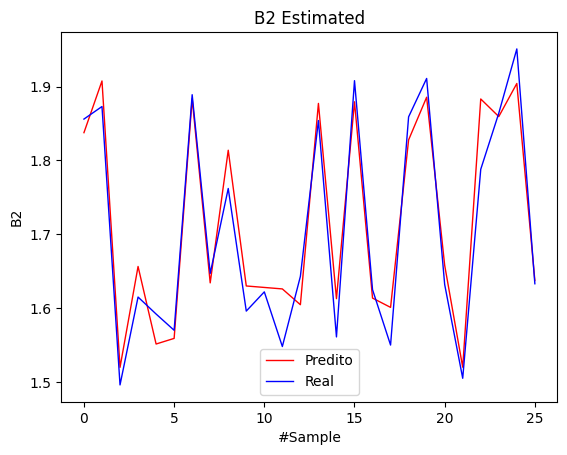

In [ ]:
mysignals = [{'name': 'Predito', 'y': yhat_knn_ts,'color':'r', 'linewidth':1},
            {'name': 'Real', 'y': y_test, 'color':'b', 'linewidth':1}]

fig, ax = plt.subplots()
for signal in mysignals:
    ax.plot(signal['y'],
            color=signal['color'],
            linewidth=signal['linewidth'],
            label=signal['name'])

# Enable legend
ax.legend()
ax.set_title("B2 Estimated")
plt.xlabel("#Sample")
plt.ylabel("B2")
plt.show()

In [ ]:
# PLS

yhat_pls_ts = model_pls_b2.predict(X_ts_b2)
print("RMSE:",mean_squared_error(yhat_pls_ts,y_test,squared=False))

RMSE: 0.04970955712679122


In [ ]:
# RF

yhat_rf_ts = model_rf_b2.predict(X_ts_b2)
print("RMSE:",mean_squared_error(yhat_rf_ts,y_test,squared=False))

RMSE: 0.041626325739188896


In [ ]:
## StackingRegression

estimators = [('knn', model_knn_b2), ('svr', model_svr_b2), ('rf', model_rf_b2), ('pls', model_pls_b2)]
er_b2 = StackingRegressor(estimators=estimators, final_estimator=KNeighborsRegressor())

er_b2.fit(X_train, y_train)
yhat_er_ts = er_b2.predict(X_ts_b2)
print("RMSE:",mean_squared_error(yhat_er_ts,y_test,squared=False))

RMSE: 0.04933553875874249


## Deployment

In [91]:
#SiO2
joblib.dump(model_knn_sio2, 'model_knn_sio2.pkl')
joblib.dump(model_svr_sio2, 'model_svr_sio2.pkl')
joblib.dump(model_rf_sio2, 'model_rf_sio2.pkl')
joblib.dump(model_pls_sio2, 'model_pls_sio2.pkl')
joblib.dump(ridge_sio2, 'ridge_sio2.pkl')

#CaO
joblib.dump(model_knn_cao, 'model_knn_cao.pkl')
joblib.dump(model_svr_cao, 'model_svr_cao.pkl')
joblib.dump(model_rf_cao, 'model_rf_cao.pkl')
joblib.dump(model_pls_cao, 'model_pls_cao.pkl')
joblib.dump(ridge_cao, 'ridge_cao.pkl')

#B2
joblib.dump(model_svr_b2, 'model_svm_b2.pkl')
joblib.dump(model_knn_b2, 'model_knn_b2.pkl')
joblib.dump(model_rf_b2, 'model_rf_b2.pkl')
joblib.dump(model_pls_b2, 'model_pls_b2.pkl')

['model_pls_b2.pkl']